## **Preparando os Dados**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot


In [ ]:
dados_original = pd.read_csv('https://raw.githubusercontent.com/mrafaelbatista/uniesp-mba-dados-machine-learning/master/db/dadosHab.csv')
dados_original.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


## **Avaliando as correlações**

In [ ]:
dados_original.corr()

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.000000,0.710974,-0.366542,-0.024366
Area,0.710974,1.000000,-0.283371,-0.030990
Dist_Praia,-0.366542,-0.283371,1.000000,0.025645
Dist_Farmacia,-0.024366,-0.030990,0.025645,1.000000


In [ ]:
dados_original.describe()

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,1.402926e+06,121.944800,3.021920,0.497160
std,1.883269e+06,90.536969,3.170933,0.291355
min,7.500000e+04,16.000000,0.000000,0.000331
25%,4.600000e+05,70.000000,0.438417,0.238640
50%,8.200000e+05,93.000000,1.476958,0.503260
75%,1.590000e+06,146.000000,5.605379,0.747737
max,2.500000e+07,2000.000000,17.962942,0.999987


## **Segmentando a amostra e teste - Apenas uma variável independente**

In [ ]:
metricas = ["Area"] # (VALOR) = a(AREA) + b
x = dados_original[metricas]
x.head()

,Area
0,280
1,208
2,170
3,100
4,164


In [ ]:
saida = ["Valor"]
y = dados_original[saida]
y.head()

,Valor
0,4600000
1,900000
2,2550000
3,550000
4,2200000


In [ ]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size =0.30)
print(treino_x.shape)
print(teste_x.shape)

(3500, 1)
(1500, 1)


In [ ]:
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 3500 elementos e testaremos com 1500 elementos


# **Regressão Linear Simples**

## **Regressão Linear Simple com Sklearn**

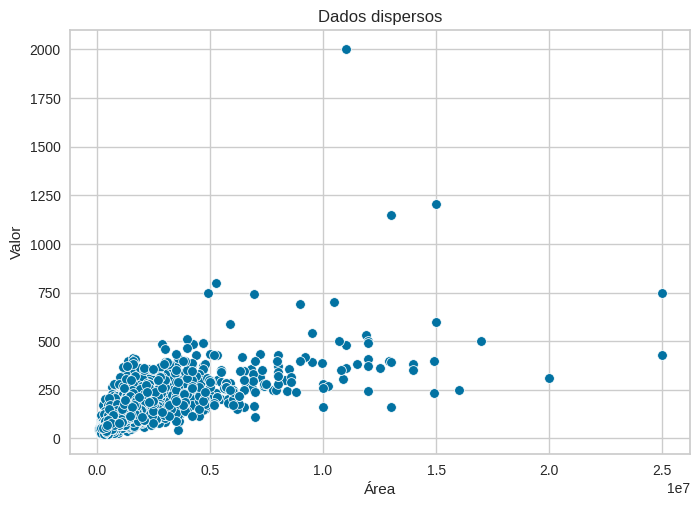

In [ ]:
ax = sns.scatterplot(x=treino_y['Valor'], y=treino_x['Area'])

ax.set_title('Dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor')
plt.show()

In [ ]:
valor = np.log(treino_y['Valor'])
area = np.log(treino_x['Area'])

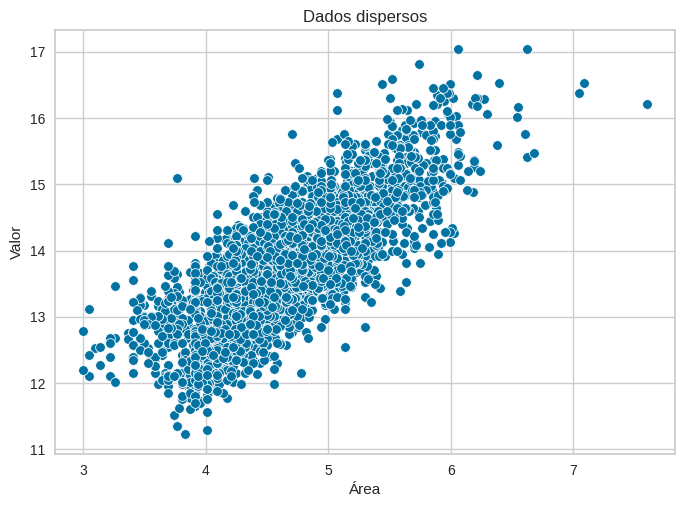

In [ ]:
ax = sns.scatterplot(x=area, y=valor)

ax.set_title('Dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor')
plt.show()

### **Construção do Modelo**

In [ ]:
############################
## Modelo do sk-learn¶

lr = LinearRegression()

In [ ]:
#Treinamento

lr.fit(np.array(area).reshape(len(area), 1), valor)

LinearRegression()

In [ ]:
#Ponto de interceptação em y
print(lr.intercept_)

#coeficiente ou inclinação
print(lr.coef_)

7.744784529264916
[1.28476973]


### **Validação - Teste**

In [ ]:
test_pred = lr.predict(teste_x)
test_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 61.70511333, 136.22175786,  78.40711986, ...,  28.30110026,
       105.38728426, 104.10251453])

In [ ]:
areaConhecida = np.log(100)
valorDesconhecido = lr.predict([[areaConhecida]])
np.exp(valorDesconhecido) #mostrar o valor real

array([857149.64822136])

In [ ]:
r2_score(teste_y, test_pred)

-0.5123873680334108

In [ ]:
rmse = sqrt(mean_squared_error(teste_y, test_pred))
print(rmse)

mae = mean_absolute_error(teste_y, test_pred)
print(mae)

2535164.665773206
1475730.1349640014


### **Visualização Gráfica**

0.6393938938441663

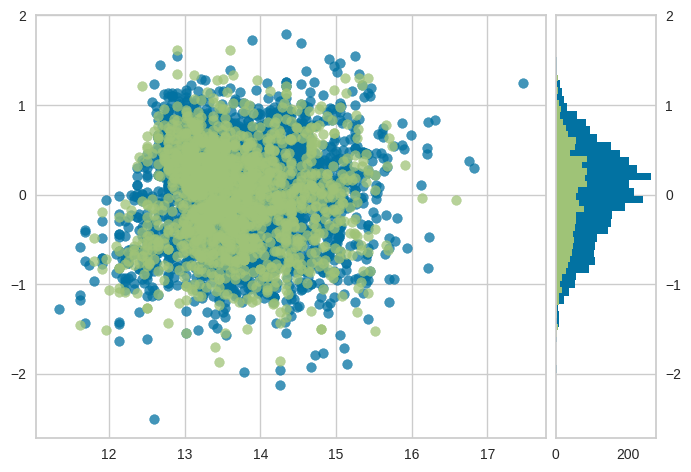

In [ ]:
x1 = np.log(x)
y1 = np.log(y)

X_train, X_test, y_train, y_test = train_test_split(
    x1, y1, test_size=0.3, random_state=42)

model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(np.array(X_train), np.array(y_train))  # Fit the training data to the visualizer
visualizer.score(np.array(X_test), np.array(y_test))  # Evaluate the model on the test data

Um uso comum do gráfico de resíduos é analisar a variação do erro do regressor. Se os pontos são dispersos aleatoriamente ao redor do eixo horizontal, um modelo de regressão linear é geralmente apropriado para os dados; caso contrário, um modelo não linear é mais apropriado. No caso acima, vemos uma distribuição uniforme e aleatória dos resíduos em relação ao alvo em duas dimensões. Isso parece indicar que nosso modelo linear está funcionando bem. Também podemos ver no histograma que nosso erro é normalmente distribuído em torno de zero, o que geralmente também indica um modelo bem ajustado.

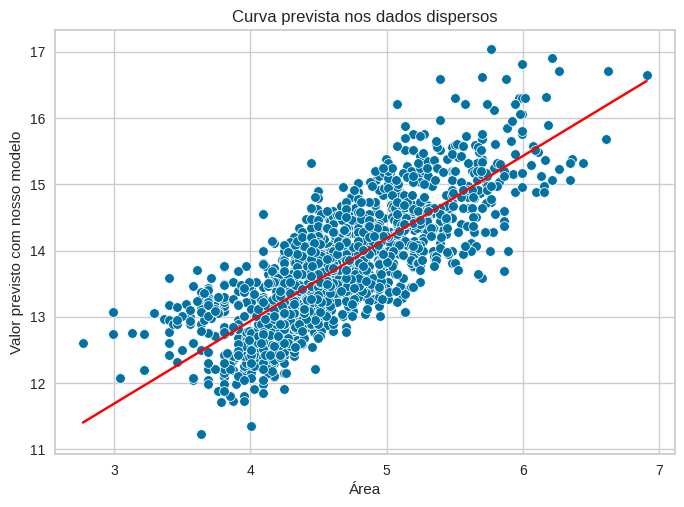

In [ ]:
###Visualizando nossos resultados de forma gráfica
#Usando os dados de teste

#Transformacao das entradas
valor_ = np.array(np.log(teste_y['Valor']))
area_ = np.array(np.log(teste_x['Area']))

ax = sns.scatterplot(x=area_, y=valor_)

model = LinearRegression()
model.fit(np.array(area_).reshape(len(area_),1), valor_)

y_p = model.predict(np.array(area_).reshape(len(area_),1))

ax = sns.lineplot(x=area_,y = y_p, color = 'red')

ax.set_title('Curva prevista nos dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor previsto com nosso modelo')
plt.show()

<ipython-input-23-686652971b77>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo) #residuo = y_train - y_previsto_train


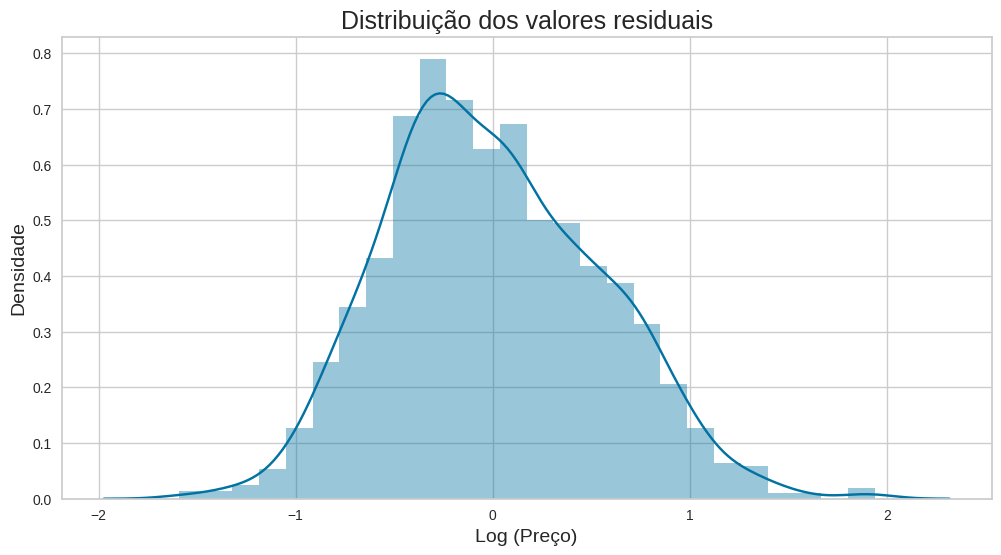

In [ ]:
residuo = valor_ - y_p

ax = sns.distplot(residuo) #residuo = y_train - y_previsto_train
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição dos valores residuais', fontsize=18)
ax.set_xlabel('Log (Preço)', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)
plt.show()

# **Regressão Linear Múltipla**

## **Método 1 - Com o sklearn**

In [ ]:
########################
## Regressão multivariável

dados_original = pd.read_csv('https://raw.githubusercontent.com/mrafaelbatista/uniesp-mba-dados-machine-learning/master/db/dadosHab.csv')
dados_original.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [ ]:
#Reajustando as amostras de teste e treino

metricas = ["Area","Dist_Praia","Dist_Farmacia"]
x = dados_original[metricas]

saida = ["Valor"]
y = dados_original[saida]

### **Segmentação da amostra - treino e teste**

In [ ]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size =0.3, random_state=42)

#treino , teste = train_test_split(x, y, test_size =0.3, random_state=42)

### **Criação e Treinamento do Modelo**

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(treino_x, treino_y)

LinearRegression()

In [ ]:
#Ponto de interceptação em y
print(lr.intercept_)

#Inclinação
print(lr.coef_)

[70111.48182996]
[[  13290.50727564 -108292.21055439   67608.60319725]]


### **Etapa de Teste do Modelo**

In [ ]:
imovel = [[200, 0.25, 0.80]]
ValorPrevisto = lr.predict(imovel)
ValorPrevisto

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2755226.76687744]])

In [ ]:
valor_p = lr.predict(teste_x)

### **Avaliação do Modelo**

In [ ]:
r2_score(y, lr.predict(x))

0.5345737127895189

In [ ]:
rmse = sqrt(mean_squared_error(teste_y, test_pred))
print(rmse)

mae = mean_absolute_error(teste_y, test_pred)
print(mae)

2285449.0106493607
1392021.8022973347


<ipython-input-34-2bc2c169618b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo)


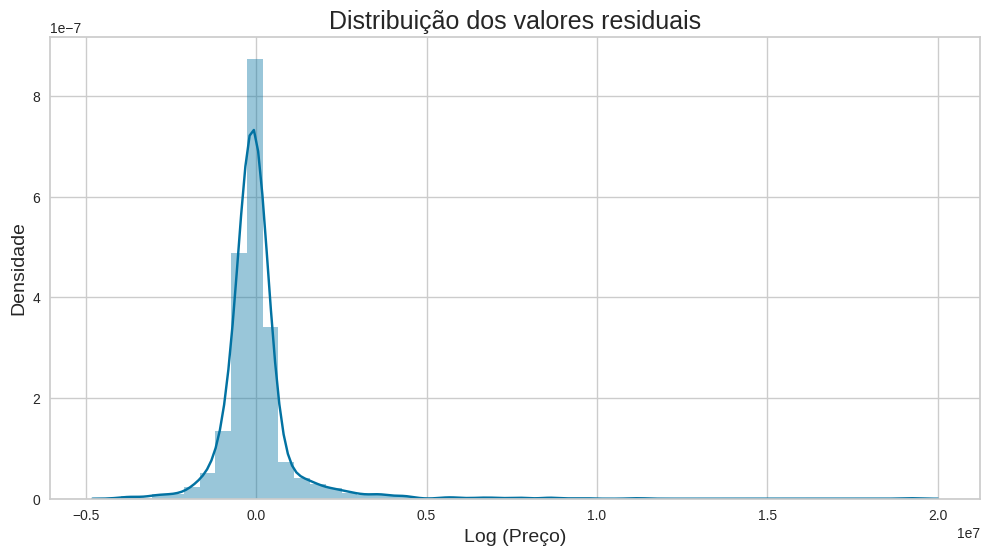

In [ ]:
residuo = teste_y - valor_p #residuo = y_train - y_previsto_train

ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição dos valores residuais', fontsize=18)
ax.set_xlabel('Log (Preço)', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)
plt.show()